In [1]:
import os
import pickle
from collections import defaultdict, OrderedDict

import networkx as nx
import nxviz as nv
import pandas as pd
from gensim.corpora import Dictionary

import matplotlib.pyplot as plt
% matplotlib inline

## 43, 129 --> 0.5663854115643483

Main goal of this notebook is just to create nice viz of the different points of the graph throughout it's lifecycle

In [2]:
p_graph = nx.read_gpickle(f'./combined_graphs/43/129.gpickle')

In [3]:
p_graph.nodes(data=True)

NodeDataView({17809: {'doc_id': -1, 'tf_idf': -1, 'term_id': 903, 'type': 'SYN'}, 17844: {'doc_id': -1, 'tf_idf': -1, 'term_id': 938, 'type': 'SYN'}, 17352: {'doc_id': -1, 'tf_idf': -1, 'term_id': 446, 'type': 'SYN'}, 17772: {'doc_id': -1, 'tf_idf': -1, 'term_id': 866, 'type': 'SYN'}, 18147: {'doc_id': -1, 'tf_idf': -1, 'term_id': 1241, 'type': 'SYN'}, 18048: {'doc_id': -1, 'tf_idf': -1, 'term_id': 1142, 'type': 'SYN'}, 18148: {'doc_id': -1, 'tf_idf': -1, 'term_id': 1242, 'type': 'SYN'}, 16914: {'doc_id': -1, 'tf_idf': -1, 'term_id': 8, 'type': 'SYN'}, 18149: {'doc_id': -1, 'tf_idf': -1, 'term_id': 1243, 'type': 'SYN'}, 18150: {'doc_id': -1, 'tf_idf': -1, 'term_id': 1244, 'type': 'SYN'}, 18151: {'doc_id': -1, 'tf_idf': -1, 'term_id': 1245, 'type': 'SYN'}, 17486: {'doc_id': -1, 'tf_idf': -1, 'term_id': 580, 'type': 'SYN'}, 17046: {'doc_id': -1, 'tf_idf': -1, 'term_id': 140, 'type': 'SYN'}, 18152: {'doc_id': -1, 'tf_idf': -1, 'term_id': 1246, 'type': 'SYN'}, 16907: {'doc_id': -1, 'tf_idf

In [4]:
chapter_names = pickle.load(open('./chapter_names.p', 'rb'))
spa_dictionary = Dictionary.load('./spa.dict')
syn_dictionary = Dictionary.load('./syn.dict')

In [5]:
for node, data in p_graph.nodes(data=True):
    # it's a synonym node
    if data['type'] == 'SYN':
        data['document'] = 'Synonym'
        data['term'] = syn_dictionary[data['term_id']]
        
    else:
        data['document'] = chapter_names[str(data['doc_id'])]
        data['term'] = spa_dictionary[data['term_id']]

In [15]:
p_graph.nodes(data=True)

NodeDataView({'17809: give': {'doc_id': -1, 'tf_idf': -1, 'term_id': 903, 'type': 'SYN', 'document': 'Synonym', 'term': 'give'}, '17844: yield': {'doc_id': -1, 'tf_idf': -1, 'term_id': 938, 'type': 'SYN', 'document': 'Synonym', 'term': 'yield'}, '17352: hold': {'doc_id': -1, 'tf_idf': -1, 'term_id': 446, 'type': 'SYN', 'document': 'Synonym', 'term': 'hold'}, '17772: render': {'doc_id': -1, 'tf_idf': -1, 'term_id': 866, 'type': 'SYN', 'document': 'Synonym', 'term': 'render'}, '18147: impart': {'doc_id': -1, 'tf_idf': -1, 'term_id': 1241, 'type': 'SYN', 'document': 'Synonym', 'term': 'impart'}, '18048: establish': {'doc_id': -1, 'tf_idf': -1, 'term_id': 1142, 'type': 'SYN', 'document': 'Synonym', 'term': 'establish'}, '18148: sacrifice': {'doc_id': -1, 'tf_idf': -1, 'term_id': 1242, 'type': 'SYN', 'document': 'Synonym', 'term': 'sacrifice'}, '16914: pass': {'doc_id': -1, 'tf_idf': -1, 'term_id': 8, 'type': 'SYN', 'document': 'Synonym', 'term': 'pass'}, '18149: grant': {'doc_id': -1, 'tf_

In [6]:
p_graph = nx.relabel_nodes(
    p_graph,
    {node: f"{node}: {data['term']}" for node, data in p_graph.nodes(data=True)}
)

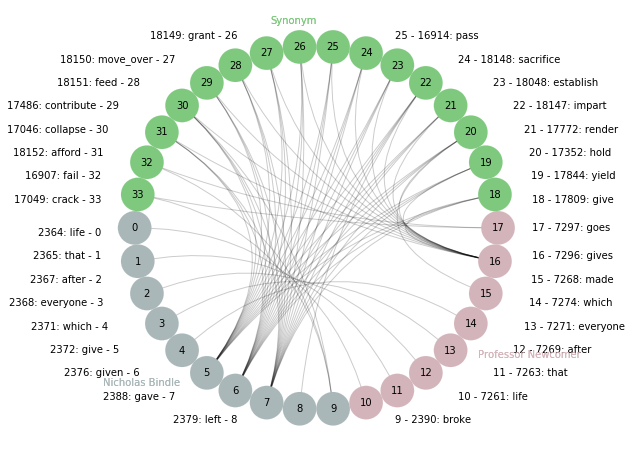

In [14]:
ap = nv.CircosPlot(
    p_graph, 
    node_color='doc_id', 
    node_grouping='document', 
    group_label_position='middle',
    group_label_color=True,
    node_labels=True, 
    node_label_layout="numbers",
    figsize=(8, 8)
)

ap.draw_group_labels()

ap.draw()
plt.show();

In [17]:
# Number of triangle relationships
total_relationships = 0
for node, data in p_graph.nodes(data=True):
    if data['type'] == 'SYN':
        num_p1_nodes = 0
        num_p2_nodes = 0
        
        for neighbor in p_graph.neighbors(node):
            if p_graph.node[neighbor]['doc_id'] == 129:
                num_p1_nodes += 1
            else:
                num_p2_nodes += 1
        
        total_relationships += (num_p1_nodes * num_p2_nodes)

In [18]:
total_relationships

49

In [21]:
# direct relationships
dr_nodes = [
    node for node, data in p_graph.nodes(data=True)
    if data['type'] == 'SPA'
    and 'SPA' in [p_graph.node[neighbor]['type'] for neighbor in p_graph.neighbors(node)]
]

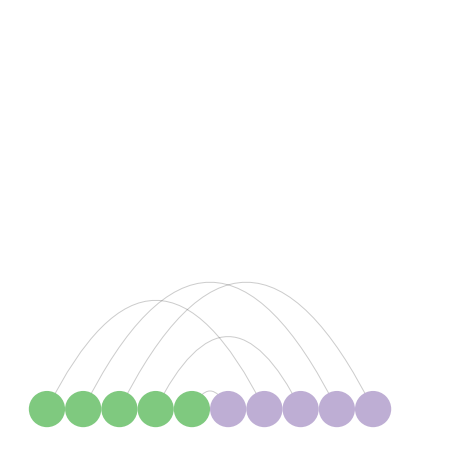

In [22]:
ap = nv.ArcPlot(
    p_graph.subgraph(dr_nodes),
    node_color='doc_id', 
    node_grouping='document', 
    group_label_position='middle',
    group_label_color=True,
    node_labels=True, 
    node_label_layout="numbers",
    figsize=(8, 8)
)

ap.draw()
plt.show();

In [27]:
p_graph.subgraph(dr_nodes).nodes(data=True)

NodeDataView({'7274: which': {'doc_id': 129, 'tf_idf': 0.03871456803693481, 'term_id': 230, 'type': 'SPA', 'document': 'Professor Newcomer', 'term': 'which'}, '2364: life': {'doc_id': 43, 'tf_idf': 0.03637743222206893, 'term_id': 29, 'type': 'SPA', 'document': 'Nicholas Bindle', 'term': 'life'}, '7261: life': {'doc_id': 129, 'tf_idf': 0.027384060472932733, 'term_id': 29, 'type': 'SPA', 'document': 'Professor Newcomer', 'term': 'life'}, '2368: everyone': {'doc_id': 43, 'tf_idf': 0.14516143564625023, 'term_id': 180, 'type': 'SPA', 'document': 'Nicholas Bindle', 'term': 'everyone'}, '7263: that': {'doc_id': 129, 'tf_idf': 0.02872241997205062, 'term_id': 50, 'type': 'SPA', 'document': 'Professor Newcomer', 'term': 'that'}, '2367: after': {'doc_id': 43, 'tf_idf': 0.07852379511052927, 'term_id': 108, 'type': 'SPA', 'document': 'Nicholas Bindle', 'term': 'after'}, '2365: that': {'doc_id': 43, 'tf_idf': 0.019077665396259092, 'term_id': 50, 'type': 'SPA', 'document': 'Nicholas Bindle', 'term': 

In [28]:
syn_nodes = set()

for node, data in p_graph.nodes(data=True):
    if data['type'] == 'SYN':
        syn_nodes.add(node)
        
        for neighbor in p_graph.neighbors(node):
            syn_nodes.add(neighbor)

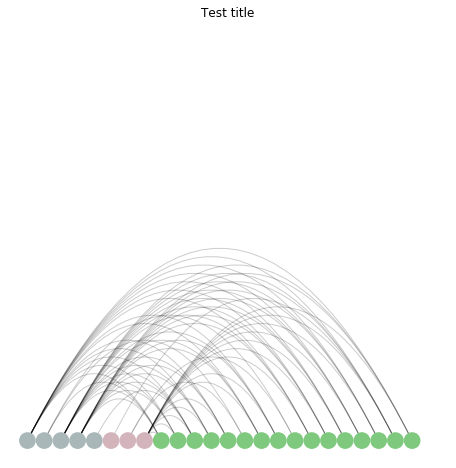

In [31]:
ap = nv.ArcPlot(
    p_graph.subgraph(list(syn_nodes)),
    node_color='doc_id', 
    node_grouping='document', 
    group_label_position='middle',
    group_label_color=True,
    node_labels=True, 
    node_label_layout="numbers",
    figsize=(8, 8)
)

ap.draw()
plt.title('Test title')
plt.show();

In [71]:
base_43 = nx.read_gpickle('./base_graphs/43.gpickle')
base_129 = nx.read_gpickle('./base_graphs/129.gpickle')

In [73]:
spa_nodes_43 = set()
spa_nodes_129 = set()

for node, data in p_graph.nodes(data=True):
    if data['doc_id'] == 43:
        spa_nodes_43.add(data['term_id'])
    elif data['doc_id'] == 129:
        spa_nodes_129.add(data['term_id'])

In [76]:
base_43_uncontributing_nodes = [
    data['term_id'] for node, data in base_43.nodes(data=True)
    if data['type'] == 'SPA' 
    and data['term_id'] not in spa_nodes_43
]

base_129_uncontributing_nodes = [
    data['term_id'] for node, data in base_129.nodes(data=True)
    if data['type'] == 'SPA' 
    and data['term_id'] not in spa_nodes_129
]

In [78]:
spa_dict = Dictionary.load('./spa.dict')

In [79]:
uncontributing_terms = list()
for node_list in [base_129_uncontributing_nodes, base_43_uncontributing_nodes]:
    for term_id in node_list:
        uncontributing_terms.append(spa_dict[term_id])

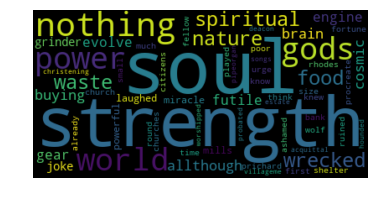

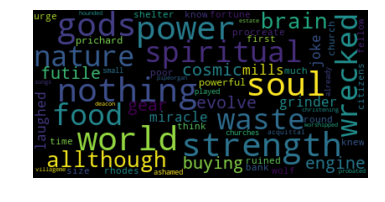

In [81]:
from wordcloud import WordCloud


text = ' '.join(uncontributing_terms)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();